In [200]:
from Scripts.model import *
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [201]:
IMG_SIZE = 16

In [202]:
def load_MNIST(data_transform, train=True):
    return torchvision.datasets.MNIST(
        "./Data/",
        download=True,
        train=train,
        transform=data_transform,
    )


def load_transformed_MNIST():
    data_transforms = [
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor(),  # Scales data into [0,1]
        #transforms.RandomHorizontalFlip(),
        transforms.Lambda(lambda t: (t * 2) - 1)  # Scale between [-1, 1]
    ]

    data_transform = transforms.Compose(data_transforms)
    train_set = load_MNIST(data_transform, train=True)
    test_set = load_MNIST(data_transform, train=False)
    return torch.utils.data.ConcatDataset([train_set, test_set])

In [203]:
full_set = load_transformed_MNIST()

In [204]:
from torch.utils.data import DataLoader

dataloader = DataLoader(full_set, batch_size=64, shuffle=True)

In [205]:
from Utils.training_utils import DiffusionUtils

In [6]:
start = 0.0001
end = 0.02
T = 100
B = torch.linspace(start, end, T)
A = 1 - B

In [206]:
utils = DiffusionUtils(start, end, diffusion_time=T)

In [215]:
noisy_img, _ = utils.add_noise_to_image(full_set[0][0], torch.tensor(75))

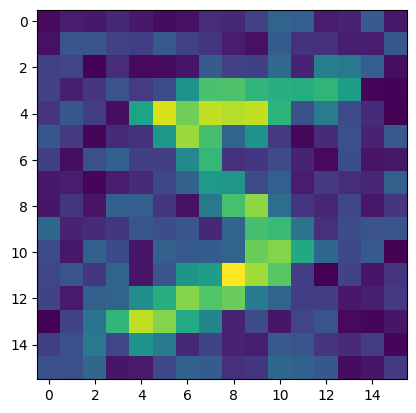

In [216]:
plt.imshow(noisy_img[0])

In [7]:
A_bar = torch.cumprod(A, 0)

In [8]:
inv_A_bar = 1 - A_bar

In [9]:
full_set[0][0].shape

torch.Size([1, 16, 16])

In [10]:
def add_noise_to_image(img, t):

    reshape_inv_A_bar = inv_A_bar[t, None, None, None]
    reshape_A_bar = A_bar[t, None, None, None]
    noise = torch.sqrt(reshape_inv_A_bar)*torch.rand_like(img)
    noisy_img = img*torch.sqrt(reshape_A_bar) + noise

    return noisy_img, noise

In [11]:
full_set[0][0].shape

torch.Size([1, 16, 16])

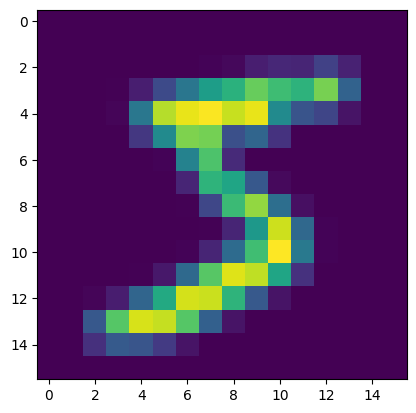

In [12]:
plt.imshow(full_set[0][0][0])

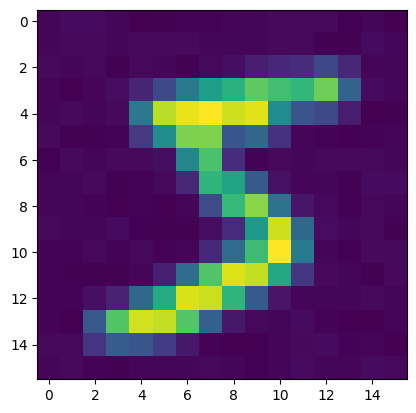

In [13]:
plt.imshow(add_noise_to_image(full_set[0][0], 5)[0][0])

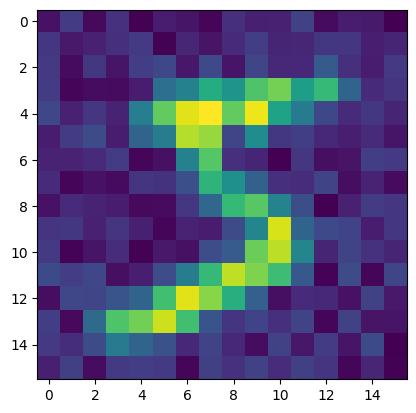

In [14]:
plt.imshow(add_noise_to_image(full_set[0][0], 50)[0][0])

In [104]:
EPOCHS = 3

In [107]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    print ("MPS device not found.")

In [108]:
device

device(type='mps')

In [112]:
model = UNet(1)
model = model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [114]:
i = 1

for epoch in range(EPOCHS):
    for (x_batch, _) in dataloader:
        print(f"{i} out of 1093")
        optimizer.zero_grad()

        x_batch = x_batch
        rand_times = torch.randint(0, T, (x_batch.shape[0],))
        noisy_images, noise = add_noise_to_image(x_batch, rand_times)
        pred_noise = model(noisy_images, rand_times.unsqueeze(1))

        loss = F.mse_loss(noise, pred_noise)
        loss.backward()
        optimizer.step()
        i += 1

        print("current loss: ", loss.item())

1 out of 1093
current loss:  0.08602507412433624
2 out of 1093
current loss:  0.07058274000883102
3 out of 1093
current loss:  0.06767848879098892
4 out of 1093
current loss:  0.06005691736936569
5 out of 1093
current loss:  0.05375198274850845
6 out of 1093
current loss:  0.0588117316365242
7 out of 1093
current loss:  0.052173081785440445
8 out of 1093
current loss:  0.05681806430220604
9 out of 1093
current loss:  0.050966277718544006
10 out of 1093
current loss:  0.04790922999382019
11 out of 1093
current loss:  0.05325258895754814
12 out of 1093
current loss:  0.04767715930938721
13 out of 1093
current loss:  0.04705605283379555
14 out of 1093
current loss:  0.058039456605911255
15 out of 1093
current loss:  0.04308222979307175
16 out of 1093
current loss:  0.04257488250732422
17 out of 1093
current loss:  0.044066593050956726
18 out of 1093
current loss:  0.04198126867413521
19 out of 1093
current loss:  0.04307100921869278
20 out of 1093
current loss:  0.042399026453495026
21 ou

In [115]:
noisy_img, noise = add_noise_to_image(full_set[0][0], 50)

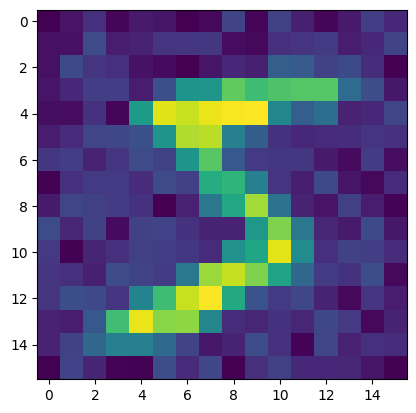

In [116]:
plt.imshow(noisy_img[0])

In [171]:
model = model.eval()

In [172]:
model(noisy_img.unsqueeze(0), torch.tensor([[50]])).shape

torch.Size([1, 1, 16, 16])

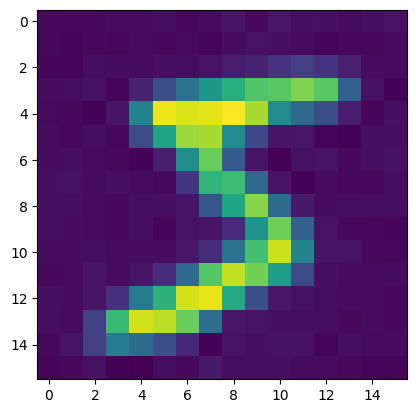

In [173]:
plt.imshow(noisy_img[0] - model(noisy_img.unsqueeze(0), torch.tensor([[50]])).detach().numpy()[0][0])

In [192]:
torch.sqrt(A)

tensor([0.9999, 0.9998, 0.9997, 0.9996, 0.9995, 0.9994, 0.9993, 0.9992, 0.9991,
        0.9990, 0.9989, 0.9988, 0.9987, 0.9986, 0.9985, 0.9984, 0.9983, 0.9982,
        0.9981, 0.9980, 0.9979, 0.9978, 0.9977, 0.9976, 0.9975, 0.9974, 0.9973,
        0.9972, 0.9971, 0.9970, 0.9969, 0.9968, 0.9967, 0.9966, 0.9965, 0.9964,
        0.9963, 0.9962, 0.9961, 0.9960, 0.9959, 0.9958, 0.9957, 0.9956, 0.9955,
        0.9954, 0.9953, 0.9952, 0.9951, 0.9950, 0.9949, 0.9948, 0.9947, 0.9946,
        0.9945, 0.9944, 0.9943, 0.9942, 0.9941, 0.9940, 0.9939, 0.9938, 0.9937,
        0.9936, 0.9935, 0.9934, 0.9933, 0.9932, 0.9931, 0.9930, 0.9929, 0.9928,
        0.9927, 0.9926, 0.9925, 0.9924, 0.9923, 0.9922, 0.9921, 0.9920, 0.9919,
        0.9918, 0.9917, 0.9916, 0.9915, 0.9914, 0.9913, 0.9912, 0.9911, 0.9910,
        0.9909, 0.9908, 0.9907, 0.9906, 0.9905, 0.9904, 0.9903, 0.9902, 0.9901,
        0.9899])

In [190]:
1/torch.sqrt(A)

tensor([1.0001, 1.0002, 1.0003, 1.0004, 1.0005, 1.0006, 1.0007, 1.0008, 1.0009,
        1.0010, 1.0011, 1.0012, 1.0013, 1.0014, 1.0015, 1.0016, 1.0017, 1.0018,
        1.0019, 1.0020, 1.0021, 1.0022, 1.0023, 1.0024, 1.0025, 1.0026, 1.0027,
        1.0028, 1.0029, 1.0030, 1.0031, 1.0032, 1.0033, 1.0034, 1.0035, 1.0036,
        1.0037, 1.0038, 1.0039, 1.0040, 1.0041, 1.0042, 1.0043, 1.0044, 1.0045,
        1.0046, 1.0047, 1.0048, 1.0049, 1.0050, 1.0051, 1.0052, 1.0053, 1.0054,
        1.0055, 1.0056, 1.0057, 1.0058, 1.0059, 1.0060, 1.0061, 1.0062, 1.0063,
        1.0064, 1.0065, 1.0066, 1.0068, 1.0069, 1.0070, 1.0071, 1.0072, 1.0073,
        1.0074, 1.0075, 1.0076, 1.0077, 1.0078, 1.0079, 1.0080, 1.0081, 1.0082,
        1.0083, 1.0084, 1.0085, 1.0086, 1.0087, 1.0088, 1.0089, 1.0090, 1.0091,
        1.0092, 1.0093, 1.0094, 1.0095, 1.0096, 1.0097, 1.0098, 1.0099, 1.0100,
        1.0102])

In [193]:
B

tensor([1.0000e-04, 3.0101e-04, 5.0202e-04, 7.0303e-04, 9.0404e-04, 1.1051e-03,
        1.3061e-03, 1.5071e-03, 1.7081e-03, 1.9091e-03, 2.1101e-03, 2.3111e-03,
        2.5121e-03, 2.7131e-03, 2.9141e-03, 3.1152e-03, 3.3162e-03, 3.5172e-03,
        3.7182e-03, 3.9192e-03, 4.1202e-03, 4.3212e-03, 4.5222e-03, 4.7232e-03,
        4.9242e-03, 5.1253e-03, 5.3263e-03, 5.5273e-03, 5.7283e-03, 5.9293e-03,
        6.1303e-03, 6.3313e-03, 6.5323e-03, 6.7333e-03, 6.9343e-03, 7.1354e-03,
        7.3364e-03, 7.5374e-03, 7.7384e-03, 7.9394e-03, 8.1404e-03, 8.3414e-03,
        8.5424e-03, 8.7434e-03, 8.9444e-03, 9.1455e-03, 9.3465e-03, 9.5475e-03,
        9.7485e-03, 9.9495e-03, 1.0151e-02, 1.0352e-02, 1.0553e-02, 1.0754e-02,
        1.0955e-02, 1.1156e-02, 1.1357e-02, 1.1558e-02, 1.1759e-02, 1.1960e-02,
        1.2161e-02, 1.2362e-02, 1.2563e-02, 1.2764e-02, 1.2965e-02, 1.3166e-02,
        1.3367e-02, 1.3568e-02, 1.3769e-02, 1.3970e-02, 1.4171e-02, 1.4372e-02,
        1.4573e-02, 1.4774e-02, 1.4975e-

In [194]:
inv_A_bar

tensor([1.0002e-04, 4.0096e-04, 9.0283e-04, 1.6052e-03, 2.5078e-03, 3.6101e-03,
        4.9115e-03, 6.4111e-03, 8.1083e-03, 1.0002e-02, 1.2091e-02, 1.4374e-02,
        1.6850e-02, 1.9517e-02, 2.2375e-02, 2.5420e-02, 2.8652e-02, 3.2068e-02,
        3.5667e-02, 3.9447e-02, 4.3404e-02, 4.7538e-02, 5.1845e-02, 5.6324e-02,
        6.0971e-02, 6.5783e-02, 7.0759e-02, 7.5895e-02, 8.1189e-02, 8.6637e-02,
        9.2236e-02, 9.7983e-02, 1.0388e-01, 1.0991e-01, 1.1608e-01, 1.2239e-01,
        1.2883e-01, 1.3539e-01, 1.4208e-01, 1.4890e-01, 1.5582e-01, 1.6287e-01,
        1.7002e-01, 1.7727e-01, 1.8463e-01, 1.9209e-01, 1.9964e-01, 2.0728e-01,
        2.1501e-01, 2.2282e-01, 2.3071e-01, 2.3867e-01, 2.4671e-01, 2.5481e-01,
        2.6297e-01, 2.7119e-01, 2.7947e-01, 2.8780e-01, 2.9617e-01, 3.0459e-01,
        3.1304e-01, 3.2154e-01, 3.3006e-01, 3.3861e-01, 3.4719e-01, 3.5578e-01,
        3.6439e-01, 3.7302e-01, 3.8165e-01, 3.9029e-01, 3.9893e-01, 4.0756e-01,
        4.1620e-01, 4.2482e-01, 4.3344e-

In [196]:
inv_A_bar[1]*B[2]/inv_A_bar[2]

tensor(0.0002)

In [197]:
torch.sqrt(inv_A_bar[t])

tensor(0.0200)

In [199]:
(B[t])/(torch.sqrt(inv_A_bar[t]))

tensor(0.0150)

In [186]:
def predict_previous_image(x_t, time):
    t = time.item()
    #print(x_t.shape, time)
    
    predicted_noise = model(x_t, time)
    
    print(predicted_noise.mean())
    mu = (1/torch.sqrt(A[t]))*(x_t - (B[t]*predicted_noise)/(torch.sqrt(inv_A_bar[t])))
    beta_tilde = inv_A_bar[t-1]*B[t]/inv_A_bar[t]

    #print(mu.mean(), mu.std())

    new_noise = torch.rand_like(mu)*torch.sqrt(beta_tilde)
    return mu + new_noise

In [187]:
x_t = torch.randn((1,1,16,16))

In [188]:
for t in range(1, T)[::-1]:
    t_ = torch.tensor([[t]])
    #print(t.item())
    x_t = predict_previous_image(x_t, t_)
    # plt.figure()
    # plt.imshow(x_t.detach().numpy()[0][0])
    # plt.colorbar()
    # plt.show()

tensor(0.0206, grad_fn=<MeanBackward0>)
tensor(0.0225, grad_fn=<MeanBackward0>)
tensor(0.0248, grad_fn=<MeanBackward0>)
tensor(0.0259, grad_fn=<MeanBackward0>)
tensor(0.0277, grad_fn=<MeanBackward0>)
tensor(0.0281, grad_fn=<MeanBackward0>)
tensor(0.0297, grad_fn=<MeanBackward0>)
tensor(0.0305, grad_fn=<MeanBackward0>)
tensor(0.0309, grad_fn=<MeanBackward0>)
tensor(0.0308, grad_fn=<MeanBackward0>)
tensor(0.0302, grad_fn=<MeanBackward0>)
tensor(0.0295, grad_fn=<MeanBackward0>)
tensor(0.0285, grad_fn=<MeanBackward0>)
tensor(0.0275, grad_fn=<MeanBackward0>)
tensor(0.0256, grad_fn=<MeanBackward0>)
tensor(0.0246, grad_fn=<MeanBackward0>)
tensor(0.0224, grad_fn=<MeanBackward0>)
tensor(0.0201, grad_fn=<MeanBackward0>)
tensor(0.0183, grad_fn=<MeanBackward0>)
tensor(0.0164, grad_fn=<MeanBackward0>)
tensor(0.0150, grad_fn=<MeanBackward0>)
tensor(0.0135, grad_fn=<MeanBackward0>)
tensor(0.0124, grad_fn=<MeanBackward0>)
tensor(0.0116, grad_fn=<MeanBackward0>)
tensor(0.0109, grad_fn=<MeanBackward0>)


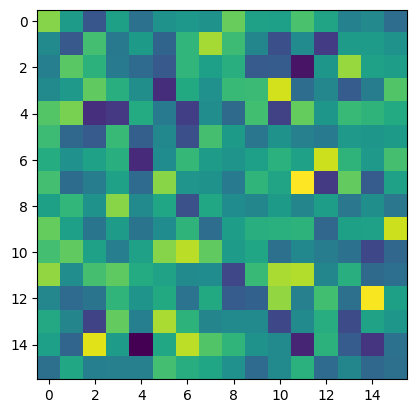

In [152]:
plt.imshow(x_t.detach().numpy()[0][0])

In [132]:
x_t.mean()

tensor(5.7735, grad_fn=<MeanBackward0>)

In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [28]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
else:
    print ("MPS device not found.")

In [29]:
mps_device

device(type='mps')

In [30]:
for x in dataloader:
    print(x)
    print(len(x))
    print(x[0].shape)
    print(x[1])
    break

[tensor([[[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9843,
           -0.6627, -0.0510,  0.1216, -0.5373, -0.9843, -1.0000, -1.0000,
           -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.7020,
            0.4039,  0.4588,  0.3647,  0.2078, -0.9451, -1.0000, -1.0000,
           -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.8902,  0.2549,
            0.3098, -0.7098, -0.725

In [2]:
x = torch.ones((1, 1, 128, 128))

In [3]:
net = UNet(1)

In [5]:
y = net(x)

In [7]:
y.shape

torch.Size([1, 1, 128, 128])

In [3]:
enc = EncoderBlock(1, 2, padding=1)
y = enc(x)

In [4]:
y

tensor([[[[4.0122, 4.4350, 4.4350,  ..., 4.4350, 4.4350, 3.5100],
          [2.1633, 0.0288, 0.0288,  ..., 0.0288, 0.0288, 0.0330],
          [2.1633, 0.0288, 0.0288,  ..., 0.0288, 0.0288, 0.0330],
          ...,
          [2.1633, 0.0288, 0.0288,  ..., 0.0288, 0.0288, 0.0330],
          [2.1633, 0.0288, 0.0288,  ..., 0.0288, 0.0288, 0.0330],
          [1.3420, 0.0790, 0.0790,  ..., 0.0790, 0.0790, 0.0532]],

         [[2.7642, 5.2036, 5.2036,  ..., 5.2036, 5.2036, 5.5992],
          [0.7336, 0.0086, 0.0086,  ..., 0.0086, 0.0086, 0.1252],
          [0.7336, 0.0086, 0.0086,  ..., 0.0086, 0.0086, 0.1252],
          ...,
          [0.7336, 0.0086, 0.0086,  ..., 0.0086, 0.0086, 0.1252],
          [0.7336, 0.0086, 0.0086,  ..., 0.0086, 0.0086, 0.1252],
          [1.4177, 0.1045, 0.1045,  ..., 0.1045, 0.1045, 0.1564]]]],
       grad_fn=<MaxPool2DWithIndicesBackward0>)

In [5]:
y.shape

torch.Size([1, 2, 32, 32])

In [6]:
dec = DecoderBlock(2, 1, transpose_stride=2, out_padding=1)

x = dec(y, y)

In [7]:
x

tensor([[[[ 3.0452, -3.1293,  6.1165,  ..., -6.9095,  1.1591, -3.6795],
          [-2.9322, -4.5297, -3.2377,  ..., -0.4525,  1.5788, -0.2614],
          [ 0.0979, -1.1171, -1.5505,  ...,  0.2066, -1.4356,  2.0224],
          ...,
          [-0.1107,  0.0540,  0.8798,  ...,  0.1280,  0.1068,  0.0890],
          [ 0.0979, -0.5197, -0.4706,  ...,  0.0992,  0.0919,  0.1047],
          [ 0.0979,  0.0979,  0.0979,  ...,  0.0979,  0.0979,  0.0979]]]],
       grad_fn=<NativeBatchNormBackward0>)

In [8]:
x.shape

torch.Size([1, 1, 66, 66])